In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')
w_test_data=pd.read_csv("test 2 (1).csv")

In [3]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [5]:
len(data[data.TripType==8].VisitNumber.unique())


12161

In [6]:
data.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

In [7]:
data.TripType.unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14,  12],
      dtype=int64)

In [8]:
len(data.TripType.unique())


38

In [9]:
len(data.VisitNumber.unique())

95674

In [11]:
data.VisitNumber.max()

191347

In [12]:
data.VisitNumber.min()

5

In [13]:
data.Upc.unique()

array([6.81131529e+10, 6.05388160e+10, 7.41081110e+09, ...,
       8.85306278e+10, 8.87439527e+10, 5.44000008e+09])

In [14]:
data.Upc.min()

834.0

In [15]:
data.Upc.max()

978970666419.0

In [16]:
data.ScanCount.unique()

array([ -1,   1,   2,   3,   5,   6,   4,  14,  -2,   9,   7,  10,   8,
        -3,  -5,  11,  16,  -4,  13,  15,  30,  -6,  12,  20, -12,  19,
        46,  23,  -7,  22,  25,  24,  31,  -9,  51,  17,  18,  71, -10],
      dtype=int64)

In [17]:
data.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', nan,
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

In [18]:
len(data.DepartmentDescription.unique())

69

In [19]:
len(data.FinelineNumber.unique())

5196

In [20]:
data.FinelineNumber.max()

9998.0

In [21]:
data.FinelineNumber.min()

0.0

In [22]:
data[data.FinelineNumber==0].count()

TripType                 3837
VisitNumber              3837
Weekday                  3837
Upc                      3837
ScanCount                3837
DepartmentDescription    3837
FinelineNumber           3837
dtype: int64

In [23]:
fineline_is_zero=data[data.FinelineNumber==0]


In [24]:
fineline_is_zero[fineline_is_zero.ScanCount==1].count()

TripType                 3743
VisitNumber              3743
Weekday                  3743
Upc                      3743
ScanCount                3743
DepartmentDescription    3743
FinelineNumber           3743
dtype: int64

In [25]:
fineline_is_zero[fineline_is_zero.ScanCount==-1].count()

TripType                 53
VisitNumber              53
Weekday                  53
Upc                      53
ScanCount                53
DepartmentDescription    53
FinelineNumber           53
dtype: int64

In [32]:
data_fineline_department = data[["DepartmentDescription", "FinelineNumber"]]

In [33]:
fineline_financial=data_fineline_department[data_fineline_department.DepartmentDescription=='FINANCIAL SERVICES'].FinelineNumber.value_counts()


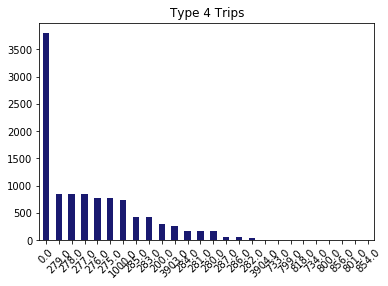

In [34]:
fineline_financial.plot(kind="bar", rot=45, title="Type 4 Trips", color="midnightblue")

In [35]:
data=data.dropna()

In [36]:
data.count()

TripType                 642925
VisitNumber              642925
Weekday                  642925
Upc                      642925
ScanCount                642925
DepartmentDescription    642925
FinelineNumber           642925
dtype: int64

In [37]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [38]:
data=data.replace("Monday",1)
data=data.replace("Tuesday",2)
data=data.replace("wednesday",3)
data=data.replace("Thursday",4)
data=data.replace("Friday",5)
data=data.replace('Saturday',6)
data=data.replace("Sunday",7)


In [39]:
data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,5,6.053882e+10,1,SHOES,8931.0
2,30,7,5,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,5,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,5,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [41]:
x=data.TripType.unique()
np.sort(x)

array([  3,   4,   5,   6,   7,   8,   9,  12,  14,  15,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44, 999],
      dtype=int64)

In [42]:
data_triptypes=data.drop_duplicates("VisitNumber")


In [43]:
data_triptypes

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,5,6.053882e+10,1,SHOES,8931.0
3,26,8,5,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
26,8,9,5,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
29,8,10,5,6.414410e+09,1,DSD GROCERY,2008.0
32,35,11,5,4.178901e+09,1,GROCERY DRY GOODS,3114.0
36,41,12,5,7.603139e+09,1,BOYS WEAR,654.0
43,21,15,5,2.899522e+09,1,FABRICS AND CRAFTS,1056.0
51,6,17,5,2.840009e+09,1,DSD GROCERY,3352.0
55,42,19,5,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0


In [45]:
x=data_triptypes["TripType"]
x=x.value_counts()



Text(0.5, 1.0, 'Number of Occuraces by trip type')

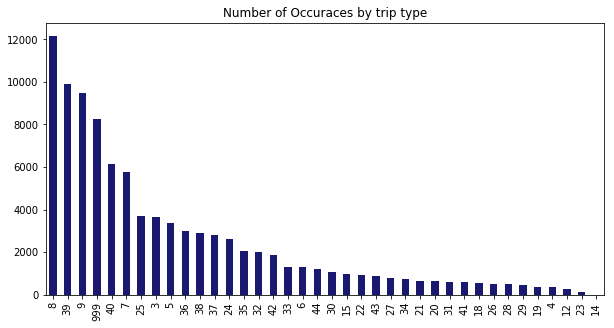

In [47]:
graph=x.plot(kind='bar',figsize=(10,5),color="midnightblue")
graph.set_title("Number of Occuraces by trip type")


Text(0, 0.5, 'ylabel')

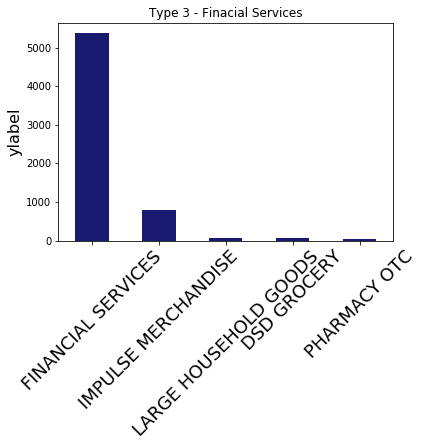

In [50]:
type_3=data[data.TripType==3]
type_3_items=type_3[['TripType','DepartmentDescription']]
type_3_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,
                                                             title='Type 3 - Finacial Services',color='midnightblue')
plt.xticks(fontsize=18)
plt.ylabel('ylabel',fontsize=16)

In [51]:
type_3_fineline = type_3.FinelineNumber.value_counts()
type_3_fineline_finance = type_3[type_3.DepartmentDescription == "FINANCIAL SERVICES"].FinelineNumber.value_counts()

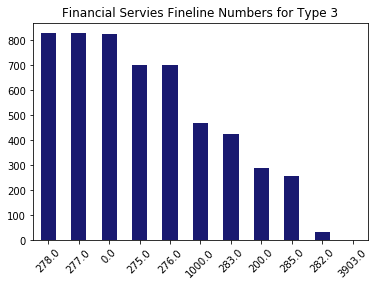

In [53]:
type_3_fineline_finance.plot(kind="bar", rot=45, title="Financial Servies Fineline Numbers for Type 3", color="midnightblue")

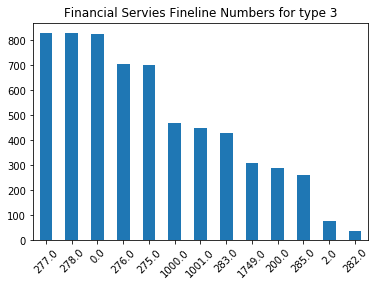

In [54]:
type_3_fineline.head(13).plot(kind="bar",rot=45,title="Financial Servies Fineline Numbers for type 3")


In [56]:
type_3_fineline.head(13)

277.0     829
278.0     829
0.0       826
276.0     703
275.0     702
1000.0    468
1001.0    449
283.0     427
1749.0    310
200.0     290
285.0     259
2.0        76
282.0      35
Name: FinelineNumber, dtype: int64

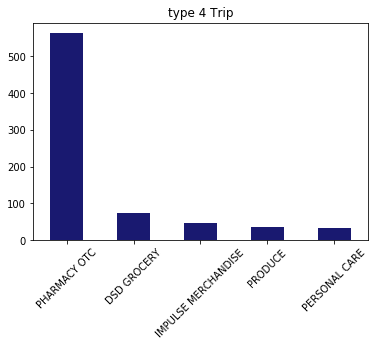

In [57]:
type_4=data[data.TripType==4]
type_4_items=type_4[['TripType',"DepartmentDescription"]]
type_4_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45,title="type 4 Trip",color="midnightblue")

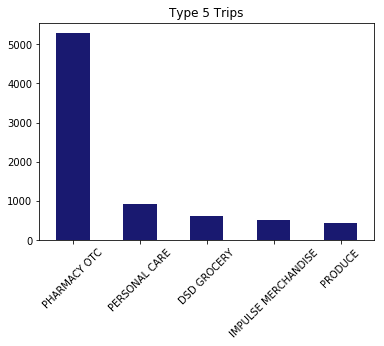

In [59]:
type_5 = data[data.TripType == 5]
type_5_items = type_5[["TripType","DepartmentDescription"]]
type_5_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 5 Trips", color="midnightblue")

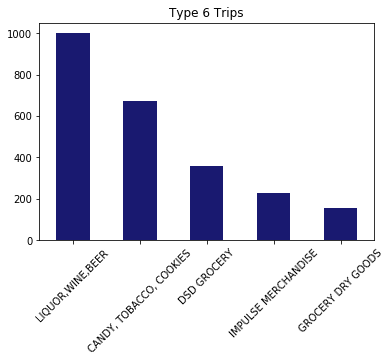

In [64]:
type_6=data[data.TripType==6]
type_6_items=type_6[['TripType',"DepartmentDescription"]]
type_6_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,title="Type 6 Trips",color="midnightblue")


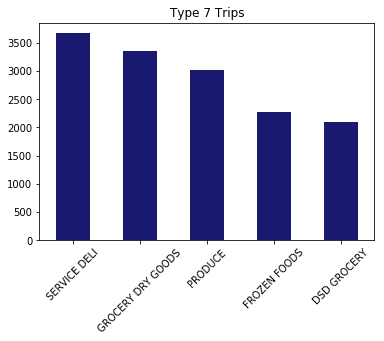

In [66]:
type_7=data[data.TripType==7]
type_7_items=type_7[["TripType","DepartmentDescription"]]
type_7_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45,title="Type 7 Trips",color="midnightblue")

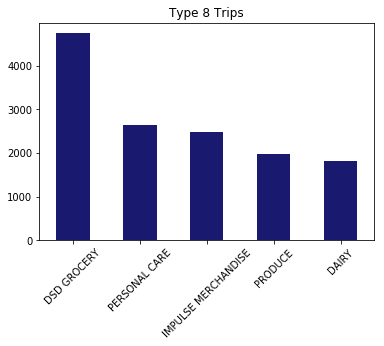

In [71]:
type_8=data[data.TripType==8]
type_8_items=type_8[['TripType',"DepartmentDescription"]]
type_8_items.DepartmentDescription. value_counts().head().plot(kind='bar',rot=45,
                                                              title="Type 8 Trips",color="midnightblue")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


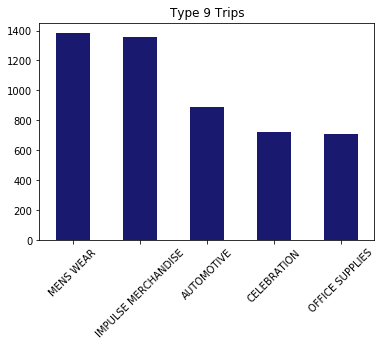

In [74]:
type_9=data[data.TripType==9]
type_9_items=type_9[["TripType","DepartmentDescription"]]
type_9_items.DepartmentDescription.value_counts().head().plot(kind="bar",rot=45,
                                                            title="Type 9 Trips",colors="midnightblue")


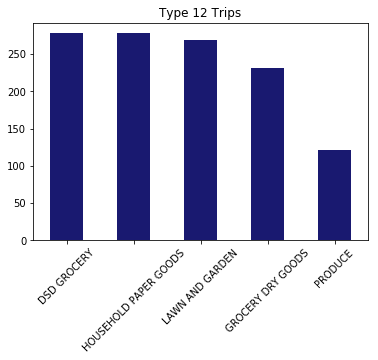

In [76]:
type_12 = data[data.TripType == 12]
type_12_items = type_12[["TripType","DepartmentDescription"]]
type_12_items.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                                              title="Type 12 Trips", color="midnightblue")


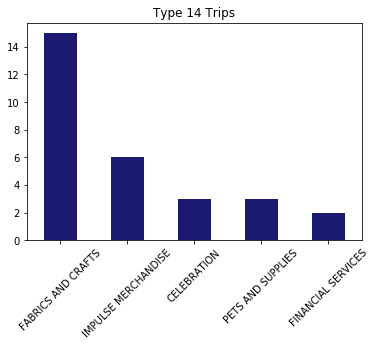

In [84]:
type_14=data[data.TripType==14]
type_14_items=type_14[['TripType','DepartmentDescription']]
type_14_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,
                                                              title="Type 14 Trips",color="midnightblue")


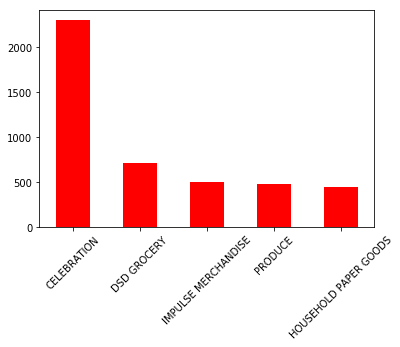

In [86]:
type_15=data[data.TripType==15]
type_15_items=type_15[["TripType","DepartmentDescription"]]

x=type_15_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,color='red')

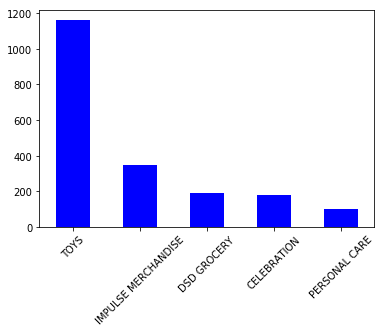

In [90]:
type_18=data[data.TripType==18]
type_18_items=type_18[['TripType','DepartmentDescription']]
type_18_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,color='blue')

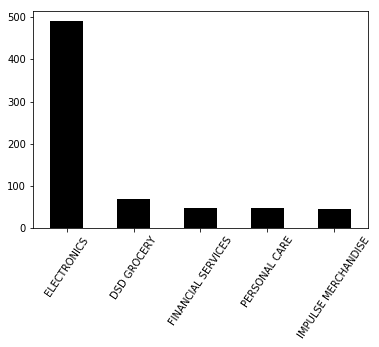

In [94]:
type_19=data[data.TripType==19]
type_19_items=type_19[['TripType','DepartmentDescription']]
type_19_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=56,color='black')

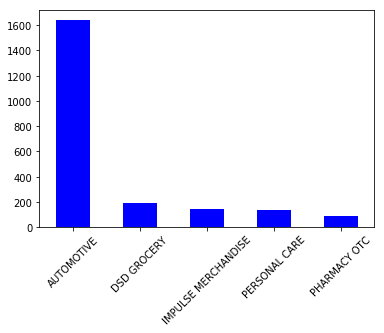

In [96]:
type_20=data[data.TripType==20]
type_20_items=type_20[['TripType',"DepartmentDescription"]]
type_20_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,color='Blue')

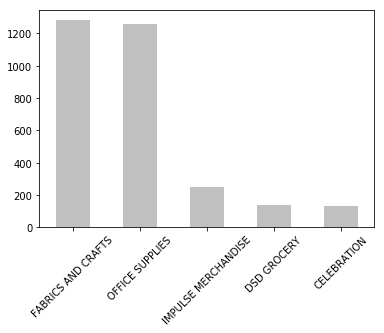

In [99]:
type_21=data[data.TripType==21]
type_21_items=type_21[["TripType","DepartmentDescription"]]
type_21_items.DepartmentDescription.value_counts().head().plot(kind='bar',rot=45,color='silver')

In [102]:
type_24=data[data.TripType==24]
type_24_items=type_24[['TripType','DepartmentDescription']]
type_24_items

,TripType,DepartmentDescription
315,24,COOK AND DINE
316,24,WIRELESS
317,24,BEDDING
318,24,BEDDING
319,24,BATH AND SHOWER
320,24,IMPULSE MERCHANDISE
321,24,COOK AND DINE
322,24,COOK AND DINE
323,24,COOK AND DINE
324,24,COOK AND DINE


In [ ]:
type_25=data[data.TripType==25]
type_25_items